# 1. Defining the problem statement
   Complete the analysis of what sorts of people were likely to survive.
   In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [2]:
# Imports needed for the script
import numpy as np
import pandas as pd
from sklearn import model_selection as ms
import math

# Collecting the data

# Data Dictionary
Survived: 0 = No, 1 = Yes

    pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    sibsp: # of siblings / spouses aboard the Titanic
    parch: # of parents / children aboard the Titanic
    ticket: Ticket number
    cabin: Cabin number
    embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
titanic = pd.read_excel("titanic3.xls")
titanic.head(80)

pclass  survived                                               name  \
0        1         1                      Allen, Miss. Elisabeth Walton   
1        1         1                     Allison, Master. Hudson Trevor   
2        1         0                       Allison, Miss. Helen Loraine   
3        1         0               Allison, Mr. Hudson Joshua Creighton   
4        1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5        1         1                                Anderson, Mr. Harry   
6        1         1                  Andrews, Miss. Kornelia Theodosia   
7        1         0                             Andrews, Mr. Thomas Jr   
8        1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9        1         0                            Artagaveytia, Mr. Ramon   
10       1         0                             Astor, Col. John Jacob   
11       1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
12       1         1                      Aubart, Mme. Leontine Pauline   
13       1         1                       Barber, Miss. Ellen "Nellie"   
14       1         1               Barkworth, Mr. Algernon Henry Wilson   
15       1         0                                Baumann, Mr. John D   
16       1         0                           Baxter, Mr. Quigg Edmond   
17       1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
18       1         1                              Bazzani, Miss. Albina   
19       1         0                               Beattie, Mr. Thomson   
20       1         1                      Beckwith, Mr. Richard Leonard   
21       1         1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
22       1         1                              Behr, Mr. Karl Howell   
23       1         1                              Bidois, Miss. Rosalie   
24       1         1                                  Bird, Miss. Ellen   
25       1         0                                Birnbaum, Mr. Jakob   
26       1         1                            Bishop, Mr. Dickinson H   
27       1         1            Bishop, Mrs. Dickinson H (Helen Walton)   
28       1         1                             Bissette, Miss. Amelia   
29       1         1          Bjornstrom-Steffansson, Mr. Mauritz Hakan   
..     ...       ...                                                ...   
50       1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
51       1         0                           Carlsson, Mr. Frans Olof   
52       1         0                            Carrau, Mr. Francisco M   
53       1         0                             Carrau, Mr. Jose Pedro   
54       1         1                Carter, Master. William Thornton II   
55       1         1                          Carter, Miss. Lucile Polk   
56       1         1                         Carter, Mr. William Ernest   
57       1         1          Carter, Mrs. William Ernest (Lucile Polk)   
58       1         0                             Case, Mr. Howard Brown   
59       1         1  Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...   
60       1         0                      Cavendish, Mr. Tyrell William   
61       1         1  Cavendish, Mrs. Tyrell William (Julia Florence...   
62       1         0                        Chaffee, Mr. Herbert Fuller   
63       1         1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
64       1         1                      Chambers, Mr. Norman Campbell   
65       1         1     Chambers, Mrs. Norman Campbell (Bertha Griggs)   
66       1         1                        Chaudanson, Miss. Victorine   
67       1         1                               Cherry, Miss. Gladys   
68       1         1                           Chevre, Mr. Paul Romaine   
69       1         1             Chibnall, Mrs. (Edith Martha Bowerman)   
70       1         0              Chisholm, Mr. Roderick Robert Crispin   
71       1         0         

In [4]:
titanic.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [6]:
def bar_chart(feature):
    survived = titanic[titanic['survived']==1][feature].value_counts()
    dead = titanic[titanic['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

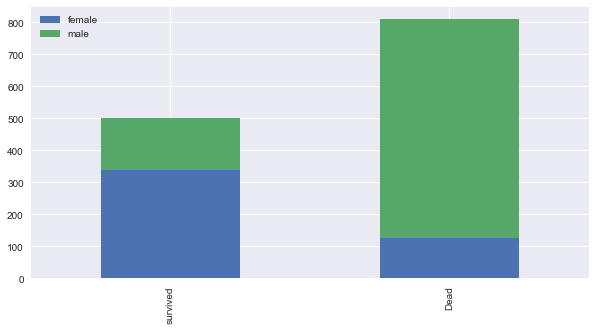

In [7]:
bar_chart('sex')

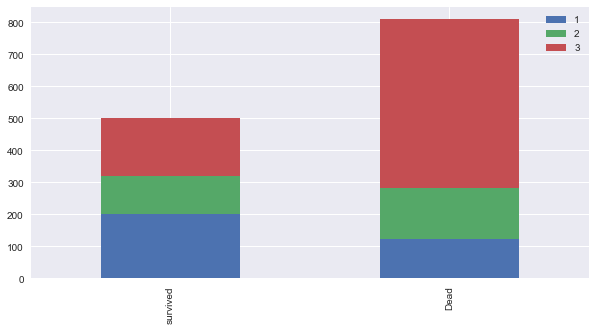

In [8]:
bar_chart('pclass')

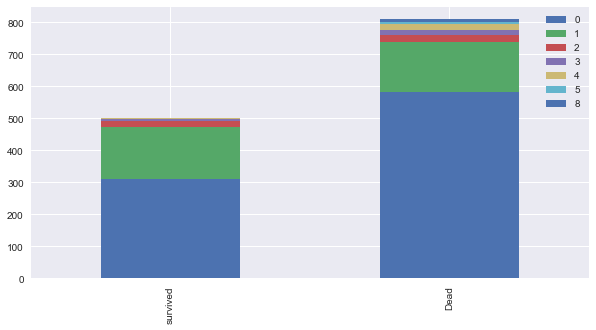

In [9]:
bar_chart('sibsp')

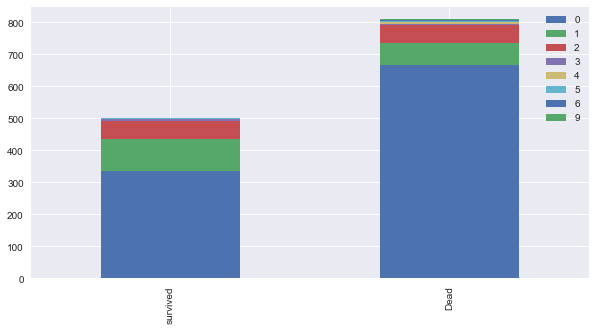

In [10]:
bar_chart('parch')

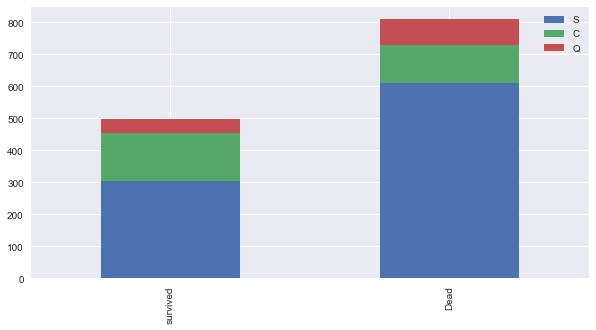

In [11]:
bar_chart('embarked')

# Cleaning the data

In [12]:
# Feature that tells whether a passenger had a cabin on the Titanic
titanic['Has_Cabin'] = titanic['cabin'].apply(lambda x: 0 if type(x) == float else 1)
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in [titanic]:
    dataset['FamilySize'] = dataset['sibsp'] + dataset['parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in [titanic]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in [titanic]:
    dataset['embarked'] = dataset['embarked'].fillna('S')
# Remove all NULLS in the Fare column
for dataset in [titanic]:
    dataset['fare'] = dataset['fare'].fillna(titanic['fare'].mean())
# Remove all NULLS in the Age column
for dataset in [titanic]:
    age_avg = dataset['age'].mean()
    age_std = dataset['age'].std()
    age_null_count = dataset['age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['age']), 'age'] = age_null_random_list
    dataset['age'] = (dataset['age'] + 0.5).astype(int)
for dataset in [titanic]:
    # Mapping Sex
    dataset.loc[ dataset['sex'] == 'male', 'sex'] = 1
    dataset.loc[ dataset['sex'] == 'female', 'sex'] = 1
    # Mapping Embarked
    dataset['embarked'] = dataset['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    # Mapping Fare on the basis of fare of persons under 25%, 50%, 75%, 100%
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[ dataset['fare'] > 31, 'fare'] = 3
    dataset['fare'] = dataset['fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[ dataset['age'] > 64, 'age'] = 4 ;
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['parch', 'name', 'ticket', 'cabin', 'sibsp','body','boat','home.dest']
titanic = titanic.drop(drop_elements, axis = 1)
#cleaning of data completed

In [13]:
print(titanic.head())
# Creating header arrays
header = titanic.columns
y_header = [header[1]]
x_header = header.drop('survived')
#save the cleaned titanic file
titanic.to_csv('cleantitanic.csv', encoding = 'utf-8', index = False, header = None)

   pclass  survived  sex  age  fare  embarked  Has_Cabin  FamilySize  IsAlone
0       1         1    1    1     3         0          1           1        1
1       1         1    1    0     3         0          1           4        0
2       1         0    1    0     3         0          1           4        0
3       1         0    1    1     3         0          1           4        0
4       1         0    1    1     3         0          1           4        0


# how titanic sank?
sank from the bow of the ship where third class rooms located
conclusion, Pclass is key feature for classifier

In [14]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [15]:
titanic.isnull().sum()

pclass        0
survived      0
sex           0
age           0
fare          0
embarked      0
Has_Cabin     0
FamilySize    0
IsAlone       0
dtype: int64

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass        1309 non-null int64
survived      1309 non-null int64
sex           1309 non-null int64
age           1309 non-null int32
fare          1309 non-null int32
embarked      1309 non-null int32
Has_Cabin     1309 non-null int64
FamilySize    1309 non-null int64
IsAlone       1309 non-null int64
dtypes: int32(3), int64(6)
memory usage: 76.8 KB


In [17]:
# Splitting x and y data
x_titanic = np.genfromtxt("cleantitanic.csv", delimiter = ",",usecols = (0,2,3,4,5,6,7,8))
y_titanic = np.genfromtxt("cleantitanic.csv", delimiter = ",",usecols = (1))
# Splitting training and testing data
x_train,x_test,y_train,y_test = ms.train_test_split(x_titanic,y_titanic,random_state = 0)
x_train[0]

array([3., 1., 0., 1., 0., 0., 3., 0.])

In [18]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([int(row[col]) for row in rows])

In [19]:
# Example
unique_vals(x_train,0)

{1, 2, 3}

In [20]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {0: 0, 1: 0}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = int(row)
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [21]:
# Example
class_counts(y_train)

{0: 601, 1: 380}

In [22]:
class Question:
    """A Question is used to partition a dataset."""

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
            condition = "="
            return "Is %s %s %s?" % (x_header[self.column], condition, str(self.value))

In [23]:
# Example
q =Question(0,1)
q

Is pclass = 1?

In [24]:
# Example
example = x_train[0]
q.match(example)

False

In [25]:
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    t,f = [],[]
    for i in range(len(rows)):
        if question.match(rows[i]):
            t.append(y_train[i])
            true_rows.append(rows[i])
        else:
            f.append(y_train[i])
            false_rows.append(rows[i])
    return class_counts(t), class_counts(f),true_rows,false_rows,t,f

In [26]:
# Example
t,f,true_rows,false_rows,t_rows,f_rows =partition(x_train,q)
t[0] + t[1]

247

In [27]:
def inf_req2(n_values,y_values,t_values): #for actual entropy
    """Getting the entropy for 1 feature on that level using yes values, no values and total values."""
    prob_no = n_values/t_values
    prob_yes = y_values/t_values
    if(n_values!=0 and y_values!=0):
        entropy = -1*(prob_no*math.log(prob_no,10) + prob_yes*math.log(prob_yes,10))
    elif(n_values != 0 and y_values == 0):
        entropy = -1*(prob_no*math.log(prob_no,10))
    elif(n_values == 0 and y_values != 0):
        entropy = -1*(prob_yes*math.log(prob_yes,10))
    else:
        entropy = 0
    if(entropy == -0.0):
        entropy = 0
    return entropy

In [28]:
def inf_req(n_values,y_values,t_values): # used to find gain as i will get pure node gain will become zero
    """Getting the entropy for 1 feature on that level using yes values, no values and total values."""
    prob_no = n_values/t_values
    prob_yes = y_values/t_values
    if(n_values!=0 and y_values!=0):
        entropy = -1*(prob_no*math.log(prob_no,10) + prob_yes*math.log(prob_yes,10))
    elif(n_values != 0 and y_values == 0):
        t = class_counts(y_train)
        entropy = inf_req(t[0],t[1],t[0]+t[1])
    elif(n_values == 0 and y_values != 0):
        t = class_counts(y_train)
        entropy = inf_req(t[0],t[1],t[0]+t[1])
    else:
        t = class_counts(y_train)
        entropy = inf_req(t[0],t[1],t[0]+t[1])
    return entropy

In [29]:
# Example
inf_req(t[0],t[1],t[0]+t[1])

0.28851959636304914

In [30]:
# information required at level 0
t = class_counts(y_train)
i_req = inf_req(t[0],t[1],t[0]+t[1])
i_req

0.289914344395204

In [31]:
def t_inf_req(rows,col,i_req,val):
    """Getting overall entropy on that level."""
    total_value = len(y_train) # total values at level 0
    infreq =0
    q = Question(col,val)
    t,f,true_rows,false_rows,t_rows,f_rows = partition(rows,q)
    infreq = ((t[0]+t[1])/total_value)*inf_req(t[0],t[1],t[0]+t[1]) + ((f[0]+f[1])/total_value)*inf_req(f[0],f[1],f[0]+f[1])
    inf_gain = i_req - infreq
    return inf_gain,infreq

In [32]:
def split_info(t,f,y_train):
    sinfo = -1*((len(t)/len(y_train))*math.log(len(t)/len(y_train)) + (len(f)/len(y_train))*math.log(len(f)/len(y_train)))
    return sinfo

In [33]:
split_info(t,f,y_train)

0.0252616729011434

In [34]:
def find_best_split(rows,i_req):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None # keep train of the feature / value that produced it
    best_col = 0
    best_val = 0
    n_features = len(rows[0])  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            t,f,true_rows, false_rows,t_rows,f_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain , infreq= t_inf_req(rows,col,i_req,val)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question
                best_col, best_val = col, val

    return best_gain, best_question,best_col,best_val

In [35]:
find_best_split(x_train,i_req)

(0.017920878450286004, Is pclass = 3.0?, 0, 3.0)

In [36]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [37]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch,t,f,infreqt,infreqf,gr):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.t = t
        self.f = f
        self.infreqt = infreqt
        self.infreqf = infreqf
        self.gr = gr

# Build tree

In [38]:
def build_tree(rows,y_train,i_req):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question,col,val = find_best_split(rows,i_req)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(y_train)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    t,f,true_rows, false_rows,t_rows,f_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows,t_rows,i_req)
    infreqt = inf_req2(t[0],t[1],t[0]+t[1])

    # Recursively build the false branch.
    false_branch = build_tree(false_rows,f_rows,i_req)
    infreqf = inf_req2(f[0],f[1],f[0]+f[1])
    
    # To find gain ratio
    sinfo = split_info(t,f,y_train)
    if(sinfo !=0):
        gr = gain/sinfo
    else:
        gr = 'infinite'

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # depending on the answer.
    return Decision_Node(question, true_branch, false_branch,t,f,infreqt,infreqf,gr)

In [39]:
def made(node, spacing="",level = 1, ans = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]):
    """World's most elegant tree printing function."""
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        level -= 1;
        ans[level] += ["Reached leaf node"]
        return
    
    # Print the question at this node
    ans[level] += [level]
    ans[level] += [str(node.question)]
    a = level + 1

    # Call this function recursively on the true branch
    ans[level] += ['--> True:']
    ans[level] += ["count of 0 =" + str(node.t[0])]
    ans[level] += ["count of 1 =" + str(node.t[1])]
    ans[level] += ["entropy =" + str(node.infreqt)]
    ans[level] += ["gain ratio =" + str(node.gr)]
    made(node.true_branch, spacing + "  ",a, ans)

    # Call this function recursively on the false branch
    ans[level] += [level]
    ans[level] += [str(node.question)]
    ans[level] += ['--> False:']
    ans[level] += ["count of 0 =" + str(node.f[0])]
    ans[level] += ["count of 1 =" + str(node.f[1])]
    ans[level] += ["entropy =" + str(node.infreqf)]
    ans[level] += ["gain ratio =" + str(node.gr)]
    made(node.false_branch, spacing + "  ",a, ans)
    return ans


In [40]:
def print_tree(node, spacing="",level = 1):
    """World's most elegant tree printing function."""
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        level -= 1;
        print(spacing + "reached node leaf")
        return
    
    # Print the question at this node
    print(spacing + str(level))
    print (spacing + str(node.question))
    a = level + 1

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print(spacing +"count of 0 =", node.t[0])
    print(spacing +"count of 1 =", node.t[1])
    print(spacing +"entropy =",node.infreqt)
    print(spacing +"gain ratio =",node.gr)
    print_tree(node.true_branch, spacing + "      ",a)

    # Call this function recursively on the false branch
    print(spacing + str(level))
    print (spacing + str(node.question))
    print (spacing + '--> False:')
    print(spacing +"count of 0 =", node.f[0])
    print(spacing +"count of 1 =", node.f[1])
    print(spacing +"entropy =",node.infreqf)
    print(spacing +"gain ratio =",node.gr)
    print_tree(node.false_branch, spacing + "      ",a)

In [41]:
# Building the tree
my_tree = build_tree(x_train,y_train,i_req)
ans =made(my_tree)
ans[0] += [0]
ans[0] += ["count of 0 =" + str(class_counts(y_train)[0])]
ans[0] += ["count of 1 =" + str(class_counts(y_train)[1])]
ans[0] += ["entropy =" + str(inf_req(class_counts(y_train)[0],class_counts(y_train)[1],len(y_train)))]
ans

[[0, 'count of 0 =601', 'count of 1 =380', 'entropy =0.289914344395204'],
 [1,
  'Is pclass = 3.0?',
  '--> True:',
  'count of 0 =394',
  'count of 1 =138',
  'entropy =0.24860181025999772',
  'gain ratio =0.7094098051390281',
  1,
  'Is pclass = 3.0?',
  '--> False:',
  'count of 0 =207',
  'count of 1 =242',
  'entropy =0.2997091916116832',
  'gain ratio =0.7094098051390281'],
 [2,
  'Is fare = 2.0?',
  '--> True:',
  'count of 0 =83',
  'count of 1 =30',
  'entropy =0.25133402482143735',
  'gain ratio =3.2325421359614257',
  2,
  'Is fare = 2.0?',
  '--> False:',
  'count of 0 =249',
  'count of 1 =170',
  'entropy =0.29326425193730976',
  'gain ratio =3.2325421359614257',
  2,
  'Is age = 1.0?',
  '--> True:',
  'count of 0 =102',
  'count of 1 =90',
  'entropy =0.30018121115534735',
  'gain ratio =3.295629434700096',
  2,
  'Is age = 1.0?',
  '--> False:',
  'count of 0 =172',
  'count of 1 =85',
  'entropy =0.2756471250674296',
  'gain ratio =3.295629434700096'],
 [3,
  'Is emba

In [42]:
# To remove the left [] and putting ans in list levelwise
li = []
for i in range(len(ans)):
    for j in range(len(ans[i])):
        if(isinstance(ans[i][j],int)):
            li += [[]]
n = -1
while(n<len(li)-1):
    for i in range(len(ans)):
        for j in range(len(ans[i])):
            if(isinstance(ans[i][j],int)):
                n = n +1;
            li[n] += ["Level: " + str(ans[i][j])]

In [43]:
# To convert them in good printing format
lians = []
for i in range(len(li)):
    lians += [[]]
for i in range(len(li)):
    stri = ""
    for j in range(len(li[i])):
        stri += li[i][j]
        stri +="\n" 
    lians[i] += [stri]

In [44]:
#printing the tree in normal form which all levels are printed groupwise
for i in range(len(li)):
    print(lians[i][0])

Level: 0
Level: count of 0 =601
Level: count of 1 =380
Level: entropy =0.289914344395204

Level: 1
Level: Is pclass = 3.0?
Level: --> True:
Level: count of 0 =394
Level: count of 1 =138
Level: entropy =0.24860181025999772
Level: gain ratio =0.7094098051390281

Level: 1
Level: Is pclass = 3.0?
Level: --> False:
Level: count of 0 =207
Level: count of 1 =242
Level: entropy =0.2997091916116832
Level: gain ratio =0.7094098051390281

Level: 2
Level: Is fare = 2.0?
Level: --> True:
Level: count of 0 =83
Level: count of 1 =30
Level: entropy =0.25133402482143735
Level: gain ratio =3.2325421359614257

Level: 2
Level: Is fare = 2.0?
Level: --> False:
Level: count of 0 =249
Level: count of 1 =170
Level: entropy =0.29326425193730976
Level: gain ratio =3.2325421359614257

Level: 2
Level: Is age = 1.0?
Level: --> True:
Level: count of 0 =102
Level: count of 1 =90
Level: entropy =0.30018121115534735
Level: gain ratio =3.295629434700096

Level: 2
Level: Is age = 1.0?
Level: --> False:
Level: count of 0

In [45]:
# To make list easy to print levels in form of tree and find the no. of each level
li = []
dic = {}
n = 0
for i in range(len(ans)):
    for j in range(len(ans[i])):
        if(ans[i][j] == n):
            li += [[]]
            n = n + 1

for i in range(len(ans)):
    for j in range(len(ans[i])):
        if(isinstance (ans[i][j],int)):
            n = ans[i][j]
            li[n] += [[]]
for i in range(len(ans)):
    count = 0
    k = -1
    for j in range(len(ans[i])):
        if(isinstance (ans[i][j],int)):
            n = ans[i][j]
            count += 1
            dic[ans[i][j]] = count
            ans[i][j] = "level: " + str(ans[i][j])
            k = k + 1
        li[n][k] += [ans[i][j] ]
dic

{0: 1,
 1: 2,
 2: 4,
 3: 8,
 4: 14,
 5: 24,
 6: 44,
 7: 70,
 8: 90,
 9: 64,
 10: 52,
 11: 34,
 12: 14,
 13: 4}

In [46]:
# To convert list li in a good format to print
lians = []
for i in range(len(li)):
    lians += [[]]
    for j in range(len(li[i])):
        lians[i] += [[]]
strl =""
for i in range(len(li)):
    for j in range(len(li[i])):
        stri = ""
        strl = ""
        for l in range(60//dic[i]):
            strl += " "
        for k in range(1):
            stri = stri + strl + li[i][j][k]
        
        lians[i][j] += [stri]

In [47]:
#printing the tree till level 3 in tree form
for i in range(4):
    for j in range(len(li[i])):
        print(lians[i][j][0], end = "")
    print("\n")
    print("\n")

                                                            level: 0



                              level: 1                              level: 1



               level: 2               level: 2               level: 2               level: 2



       level: 3       level: 3       level: 3       level: 3       level: 3       level: 3       level: 3       level: 3





In [48]:
#printing tree spaced according to the level in tree  type format
print_tree(my_tree)

1
Is pclass = 3.0?
--> True:
count of 0 = 394
count of 1 = 138
entropy = 0.24860181025999772
gain ratio = 0.7094098051390281
      2
      Is fare = 2.0?
      --> True:
      count of 0 = 83
      count of 1 = 30
      entropy = 0.25133402482143735
      gain ratio = 3.2325421359614257
            3
            Is embarked = 1.0?
            --> True:
            count of 0 = 12
            count of 1 = 16
            entropy = 0.296583221518423
            gain ratio = 1.7979833046088225
                  4
                  Is age = 2.0?
                  --> True:
                  count of 0 = 1
                  count of 1 = 4
                  entropy = 0.21732201127364886
                  gain ratio = 0.7479716393866527
                        5
                        Is FamilySize = 3.0?
                        --> True:
                        count of 0 = 2
                        count of 1 = 1
                        entropy = 0.27643459094367495
                        

                                    count of 0 = 2
                                    count of 1 = 2
                                    entropy = 0.30102999566398114
                                    gain ratio = 0.4150505329368685
                                          8
                                          Is age = 2.0?
                                          --> True:
                                          count of 0 = 1
                                          count of 1 = 1
                                          entropy = 0.30102999566398114
                                          gain ratio = 0.4165198575453182
                                                reached node leaf
                                          8
                                          Is age = 2.0?
                                          --> False:
                                          count of 0 = 2
                                          count of 1 = 0
                   

                                    Is Has_Cabin = 1.0?
                                    --> True:
                                    count of 0 = 0
                                    count of 1 = 3
                                    entropy = 0
                                    gain ratio = 2.288608601532368
                                          8
                                          Is age = 2.0?
                                          --> True:
                                          count of 0 = 0
                                          count of 1 = 1
                                          entropy = 0
                                          gain ratio = 0.5346226168533992
                                                reached node leaf
                                          8
                                          Is age = 2.0?
                                          --> False:
                                          count of 0 = 2
           

                                    entropy = 0
                                    gain ratio = 0.39373831991943087
                                          reached node leaf
                                    7
                                    Is fare = 1.0?
                                    --> False:
                                    count of 0 = 3
                                    count of 1 = 1
                                    entropy = 0.24421905028821553
                                    gain ratio = 0.39373831991943087
                                          reached node leaf
                              6
                              Is age = 0.0?
                              --> False:
                              count of 0 = 36
                              count of 1 = 26
                              entropy = 0.29535625280690536
                              gain ratio = 1.2867394675020063
                                    7
                     

                                          8
                                          Is pclass = 2.0?
                                          --> False:
                                          count of 0 = 2
                                          count of 1 = 1
                                          entropy = 0.27643459094367495
                                          gain ratio = 0.39354037675017295
                                                reached node leaf
                                    7
                                    Is embarked = 1.0?
                                    --> False:
                                    count of 0 = 3
                                    count of 1 = 5
                                    entropy = 0.28731326376205835
                                    gain ratio = 0.49738531336255254
                                          8
                                          Is pclass = 2.0?
                                     

                              count of 0 = 44
                              count of 1 = 42
                              entropy = 0.30091254470747386
                              gain ratio = 1.651865903185071
                                    7
                                    Is FamilySize = 6.0?
                                    --> True:
                                    count of 0 = 3
                                    count of 1 = 1
                                    entropy = 0.24421905028821553
                                    gain ratio = 1.5082540279416548
                                          reached node leaf
                                    7
                                    Is FamilySize = 6.0?
                                    --> False:
                                    count of 0 = 44
                                    count of 1 = 38
                                    entropy = 0.2998663592516309
                                    gai

                              count of 0 = 3
                              count of 1 = 4
                              entropy = 0.296583221518423
                              gain ratio = 1.149234317943044
                                    7
                                    Is IsAlone = 1.0?
                                    --> True:
                                    count of 0 = 2
                                    count of 1 = 1
                                    entropy = 0.27643459094367495
                                    gain ratio = 0.40241297178855523
                                          reached node leaf
                                    7
                                    Is IsAlone = 1.0?
                                    --> False:
                                    count of 0 = 3
                                    count of 1 = 1
                                    entropy = 0.24421905028821553
                                    gain ratio = 

                                          gain ratio = 0.4623898530505439
                                                reached node leaf
                                          8
                                          Is Has_Cabin = 1.0?
                                          --> False:
                                          count of 0 = 6
                                          count of 1 = 4
                                          entropy = 0.29228525323862886
                                          gain ratio = 0.4623898530505439
                                                9
                                                Is IsAlone = 1.0?
                                                --> True:
                                                count of 0 = 6
                                                count of 1 = 3
                                                entropy = 0.27643459094367495
                                                gain ratio = 0.

In [49]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [50]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

# Evaluation

In [51]:
for rowx,rowy in zip(x_test,y_test):
    print ("Actual: %s. Predicted: %s" %
           (rowy, print_leaf(classify(rowx, my_tree))))

Actual: 0.0. Predicted: {0: '50%', 1: '50%'}
Actual: 1.0. Predicted: {0: '35%', 1: '64%'}
Actual: 0.0. Predicted: {0: '60%', 1: '40%'}
Actual: 0.0. Predicted: {0: '0%', 1: '100%'}
Actual: 0.0. Predicted: {0: '50%', 1: '50%'}
Actual: 1.0. Predicted: {0: '0%', 1: '100%'}
Actual: 1.0. Predicted: {0: '80%', 1: '20%'}
Actual: 1.0. Predicted: {0: '66%', 1: '33%'}
Actual: 0.0. Predicted: {0: '71%', 1: '28%'}
Actual: 1.0. Predicted: {0: '48%', 1: '52%'}
Actual: 0.0. Predicted: {0: '100%', 1: '0%'}
Actual: 0.0. Predicted: {0: '100%', 1: '0%'}
Actual: 1.0. Predicted: {0: '80%', 1: '20%'}
Actual: 1.0. Predicted: {0: '53%', 1: '46%'}
Actual: 1.0. Predicted: {0: '0%', 1: '100%'}
Actual: 0.0. Predicted: {0: '54%', 1: '45%'}
Actual: 1.0. Predicted: {0: '50%', 1: '50%'}
Actual: 1.0. Predicted: {0: '40%', 1: '60%'}
Actual: 1.0. Predicted: {0: '0%', 1: '100%'}
Actual: 0.0. Predicted: {0: '48%', 1: '52%'}
Actual: 0.0. Predicted: {0: '52%', 1: '47%'}
Actual: 0.0. Predicted: {0: '50%', 1: '50%'}
Actual: 0.

Actual: 0.0. Predicted: {0: '55%', 1: '45%'}
Actual: 0.0. Predicted: {0: '54%', 1: '45%'}
Actual: 1.0. Predicted: {0: '100%', 1: '0%'}
Actual: 0.0. Predicted: {0: '52%', 1: '47%'}
Actual: 1.0. Predicted: {0: '100%', 1: '0%'}
Actual: 0.0. Predicted: {0: '52%', 1: '47%'}
